In [1]:
import numpy as np
import random
from scipy.io import loadmat

from keras import models
from keras import layers
from model import *
import keras

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
fields = np.zeros([38, 500, 500])
phases = np.zeros([38, 8, 8])
list_num = [1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79]
list_num = np.array(list_num)/10

In [3]:
for i in range(38):
    fields[i] = loadmat(r"./data/height"+str(list_num[i])+"field.mat")['capacity']
    phases[i] = loadmat(r"./data/height"+str(list_num[i])+"phase.mat")['initial_phase']

In [4]:
phases[3]

array([[ 0.        ,  1.44960598,  2.42686996,  2.91884902,  2.91884902,
         2.42686996,  1.44960598,  0.        ],
       [ 1.44960598,  2.91884902,  3.90965661,  4.40854946,  4.40854946,
         3.90965661,  2.91884902,  1.44960598],
       [ 2.42686996,  3.90965661,  4.9098125 ,  5.41347984,  5.41347984,
         4.9098125 ,  3.90965661,  2.42686996],
       [ 2.91884902,  4.40854946,  5.41347984,  5.91958641,  5.91958641,
         5.41347984,  4.40854946,  2.91884902],
       [ 2.91884902,  4.40854946,  5.41347984,  5.91958641,  5.91958641,
         5.41347984,  4.40854946,  2.91884902],
       [ 2.42686996,  3.90965661,  4.9098125 ,  5.41347984,  5.41347984,
         4.9098125 ,  3.90965661,  2.42686996],
       [ 1.44960598,  2.91884902,  3.90965661,  4.40854946,  4.40854946,
         3.90965661,  2.91884902,  1.44960598],
       [ 0.        ,  1.44960598,  2.42686996,  2.91884902,  2.91884902,
         2.42686996,  1.44960598,  0.        ]])

In [5]:
new_fields = np.zeros([38, 256, 256])
new_phases = np.zeros([38, 256, 256])

In [6]:
for z in range(38):
    for i in range(256):
        for j in range(256):
            new_fields[z][i][j] = fields[z][round(500*i/256)][round(500*j/256)]
            new_phases[z][i][j] = phases[z][int(i/32)][int(j/32)]

In [7]:
#写一个算法随机把索引分为两个部分
index = list(range(38))
random.shuffle(index)
train_index = np.array(index[0:30])
valid_index = np.array(index[30:38])

#用索引来生成训练验证和测试集的数据
train_data = new_fields[train_index]
valid_data = new_fields[valid_index]

#用索引来生成标签（二者有函数关系）
train_label = new_phases[train_index]
valid_label = new_phases[valid_index]

In [8]:
def Normalize(data):
    #归一化
    m = np.mean(data)
    mx = max(data.flatten())
    mn = min(data.flatten())
    return [(i - m) / (mx - mn) for i in data]

In [9]:
train_data = np.array(Normalize(train_data))
train_label = np.array(Normalize(train_label))
valid_data = np.array(Normalize(valid_data))
valid_label = np.array(Normalize(valid_label))

In [10]:
valid_data

array([[[ 0.05065775,  0.05065148,  0.050644  , ...,  0.05067468,
          0.05067538,  0.05067509],
        [ 0.05065148,  0.05064361,  0.05063439, ...,  0.05067434,
          0.05067589,  0.05067631],
        [ 0.050644  ,  0.05063439,  0.05062327, ...,  0.05067343,
          0.05067595,  0.05067716],
        ..., 
        [ 0.05067468,  0.05067434,  0.05067343, ...,  0.05067056,
          0.05066845,  0.05066597],
        [ 0.05067538,  0.05067589,  0.05067595, ...,  0.05066845,
          0.05066602,  0.05066333],
        [ 0.05067509,  0.05067631,  0.05067716, ...,  0.05066597,
          0.05066333,  0.05066053]],

       [[ 0.05064168,  0.05064312,  0.05064436, ...,  0.05063566,
          0.05063438,  0.05063315],
        [ 0.05064312,  0.0506445 ,  0.05064563, ...,  0.05063688,
          0.05063541,  0.05063394],
        [ 0.05064436,  0.05064563,  0.05064656, ...,  0.05063809,
          0.05063644,  0.05063473],
        ..., 
        [ 0.05063566,  0.05063688,  0.05063809, ...,

In [11]:
valid_label.shape

(8, 256, 256)

In [12]:
train_data = train_data.reshape(30,256,256,1)
valid_data = valid_data.reshape(8,256,256,1)
train_label = train_label.reshape(30,256,256,1)
valid_label = valid_label.reshape(8,256,256,1)

In [13]:
model = unet()

/home/xuzhuang/Desktop/大创/model.py:53: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [14]:
#model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)

In [15]:
history = model.fit(train_data,
          train_label,
          steps_per_epoch=1,
          epochs=10,
          validation_data = (valid_data, valid_label),
          validation_steps=8)

Train on 30 samples, validate on 8 samples
Epoch 1/10
1/1 [==============================] - 163s 163s/step - loss: 0.6928 - acc: 0.0000e+00 - val_loss: 0.6178 - val_acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 141s 141s/step - loss: 0.5926 - acc: 0.0000e+00 - val_loss: 0.4925 - val_acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 130s 130s/step - loss: 0.4909 - acc: 0.0000e+00 - val_loss: 0.3910 - val_acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 129s 129s/step - loss: 0.3607 - acc: 0.0000e+00 - val_loss: 0.2570 - val_acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 131s 131s/step - loss: 0.2274 - acc: 0.0000e+00 - val_loss: 0.0954 - val_acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 131s 131s/step - loss: 0.0931 - acc: 0.0000e+00 - val_loss: 0.0659 - val_acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 155s 155s/step - loss: 5.6658e-04 - acc: 0.0000e+00 - val_loss: -0.1581 -

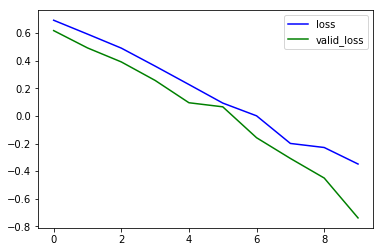

In [16]:
#这里的loss就是我们作图要用的数组了，val_loss指的是在验证集上的损失函数值的变化
loss=history.history['loss']
val_loss = history.history['val_loss']

#这里就可以作出图像，用的是matplotlib.pyplot这个包
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(loss, 'b', label='loss')
ax.plot(val_loss, 'g', label='valid_loss')
ax.legend(loc="best")

In [17]:
model.save("./model_log6", overwrite=True, include_optimizer=True )

In [18]:
#model = models.load_model("./model_log2")

In [19]:
predict_143 = model.predict(np.array(Normalize(new_fields[3].reshape(1,256,256,1))))

In [20]:
predict_143

array([[[[ 0.41534963],
         [ 0.19236104],
         [ 0.11974071],
         ..., 
         [ 0.28347966],
         [ 0.41745579],
         [ 0.46456698]],

        [[ 0.16312061],
         [ 0.06440326],
         [ 0.02453728],
         ..., 
         [ 0.13957115],
         [ 0.35415384],
         [ 0.45075384]],

        [[ 0.15759571],
         [ 0.03885843],
         [ 0.02026303],
         ..., 
         [ 0.11975987],
         [ 0.30807287],
         [ 0.4777011 ]],

        ..., 
        [[ 0.13615756],
         [ 0.05699483],
         [ 0.03142534],
         ..., 
         [ 0.18038379],
         [ 0.24430031],
         [ 0.4209747 ]],

        [[ 0.1626029 ],
         [ 0.10578124],
         [ 0.06600442],
         ..., 
         [ 0.22851995],
         [ 0.28252351],
         [ 0.42489773]],

        [[ 0.33107749],
         [ 0.21414579],
         [ 0.16024633],
         ..., 
         [ 0.29027262],
         [ 0.29875791],
         [ 0.39151987]]]], dtype=float32)